In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp
import seaborn as sns
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt

In [2]:
phenoR = pd.read_csv("02162024_Sask_Data_2003-2022_Pheno_AMR.csv")

In [3]:
phenoR.head()

,NCBI-NAME,Penicillin_Classification,Spectinomycin_Classification,Tetracycline_Classification,Erythromycin_Classification,Ceftriaxone_Classification,Ciprofloxacin_Classification,Cefixime_Classification,Azithromycin_Classification,Gentamicin_Classification,Ertapenem_Classification
0,NG-1-2018,I,S,R,S,S,S,S,S,I,S
1,NG-2-2018,I,S,R,S,S,S,S,S,I,S
2,NG-3-2018,I,S,I,S,S,R,S,S,I,S
3,NG-4-2018,I,S,I,S,S,R,S,S,I,S
4,NG-5-2018,R,S,R,R,S,R,S,S,I,S


In [96]:
phenoR = phenoR.apply(lambda x: x.str.replace('s', 'S'))

In [5]:
phenoR['Year'] = phenoR['NCBI-NAME'].str[-4:]

In [6]:
phenoR.head()

,NCBI-NAME,Penicillin_Classification,Spectinomycin_Classification,Tetracycline_Classification,Erythromycin_Classification,Ceftriaxone_Classification,Ciprofloxacin_Classification,Cefixime_Classification,Azithromycin_Classification,Gentamicin_Classification,Ertapenem_Classification,Year
0,NG-1-2018,I,S,R,S,S,S,S,S,I,S,2018
1,NG-2-2018,I,S,R,S,S,S,S,S,I,S,2018
2,NG-3-2018,I,S,I,S,S,R,S,S,I,S,2018
3,NG-4-2018,I,S,I,S,S,R,S,S,I,S,2018
4,NG-5-2018,R,S,R,R,S,R,S,S,I,S,2018


In [59]:
phenoR['Year'] = phenoR['Year'].astype(str)
count_2018 = (phenoR['Year'] == '2018').sum()
count_2018

127

In [60]:
phenoR['Year'] = phenoR['Year'].astype(str)
count_2017 = (phenoR['Year'] == '2017').sum()
count_2017

78

In [61]:
phenoR['Year'] = phenoR['Year'].astype(str)
count_2019 = (phenoR['Year'] == '2019').sum()
count_2019

119

In [62]:
phenoR['Year'] = phenoR['Year'].astype(str)
count_2020 = (phenoR['Year'] == '2020').sum()
count_2020

48

In [63]:
phenoR['Year'] = phenoR['Year'].astype(str)
count_2021 = (phenoR['Year'] == '2021').sum()
count_2021

41

In [64]:
phenoR['Year'] = phenoR['Year'].astype(str)
count_2022 = (phenoR['Year'] == '2022').sum()
count_2022

28

In [7]:
crosstab_pen = pd.crosstab(phenoR['Year'], phenoR['Penicillin_Classification'])

In [8]:
crosstab_pen

Penicillin_Classification,I,R,S
Year,,,
2003,50,4,6
2004,37,4,18
2005,40,6,6
2006,44,0,11
2007,44,0,9
2008,36,1,4
2009,30,0,4
2010,18,0,11
2011,29,1,1


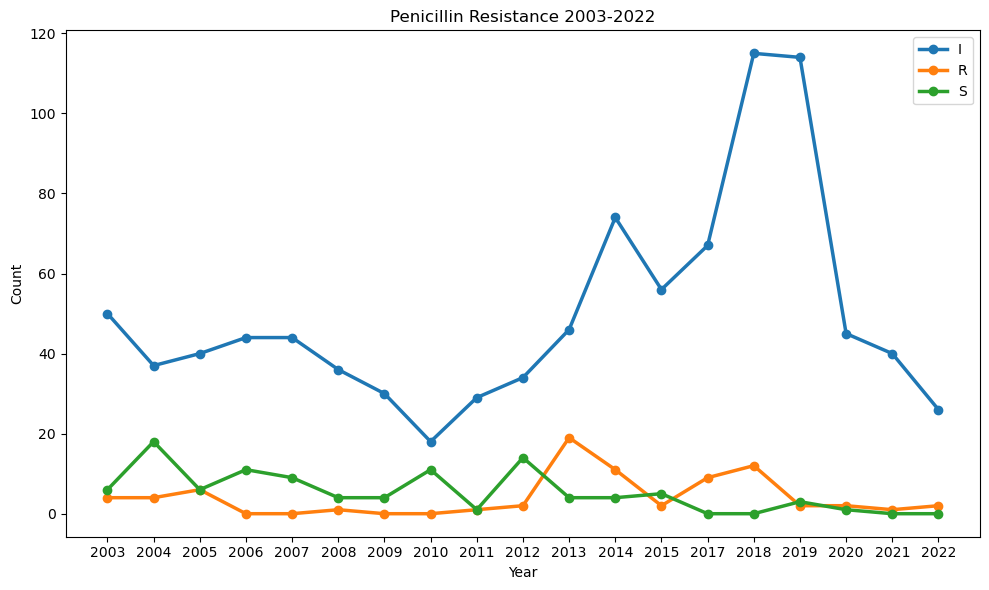

In [13]:
#crosstab_pen.set_index('Year', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))


for column in crosstab_pen.columns:
    plt.plot(crosstab_pen.index, crosstab_pen[column], marker='o', label=column, linewidth=2.5)  # Set a higher linewidth value

plt.title('Penicillin Resistance 2003-2022')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(False)
plt.xticks(crosstab_pen.index)  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

In [84]:
crosstab_spect = pd.crosstab(phenoR['Year'], phenoR['Spectinomycin_Classification'])
crosstab_spect.insert(1, 'R', 0)
crosstab_spect


Spectinomycin_Classification,I,R,S
Year,,,
2003,0,0,60
2004,11,0,48
2005,0,0,52
2006,0,0,55
2007,3,0,50
2008,0,0,41
2009,0,0,34
2010,0,0,29
2011,0,0,31


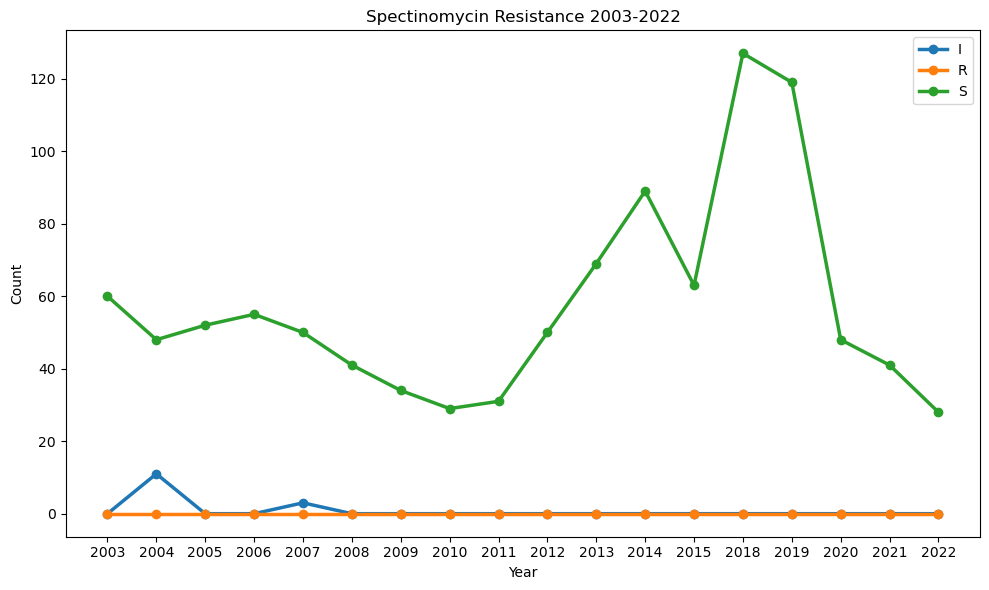

In [85]:
#crosstab_spect.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))


for column in crosstab_spect.columns:
    plt.plot(crosstab_spect.index, crosstab_spect[column], marker='o', label=column, linewidth=2.5)  # Set a higher linewidth value

plt.title('Spectinomycin Resistance 2003-2022')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(False)
plt.xticks(crosstab_spect.index)  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

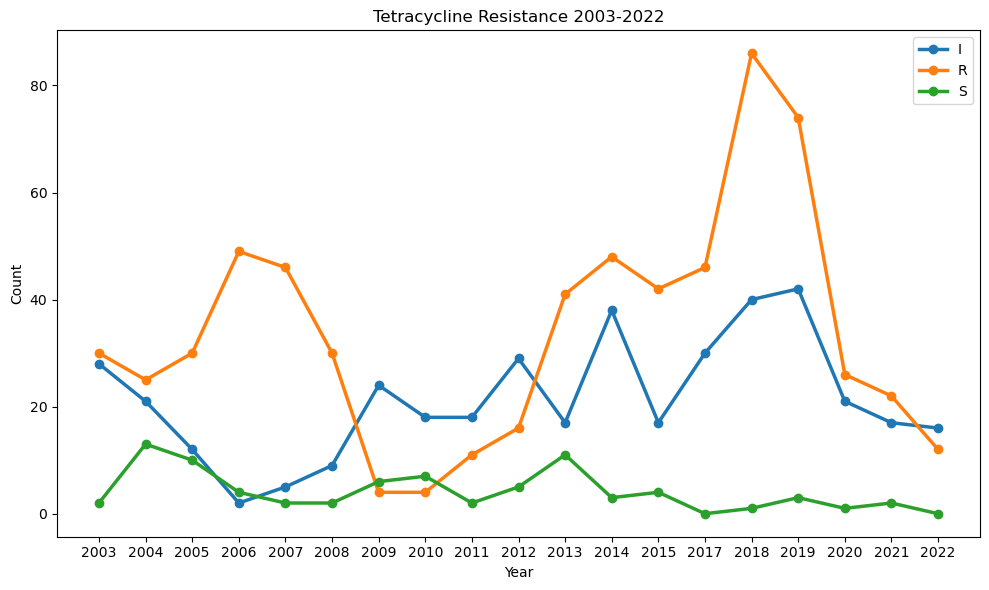

In [86]:
crosstab_tet = pd.crosstab(phenoR['Year'], phenoR['Tetracycline_Classification'])
plt.figure(figsize=(10, 6))


for column in crosstab_tet.columns:
    plt.plot(crosstab_tet.index, crosstab_tet[column], marker='o', label=column, linewidth=2.5)  # Set a higher linewidth value

plt.title('Tetracycline Resistance 2003-2022')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(False)
plt.xticks(crosstab_tet.index)  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

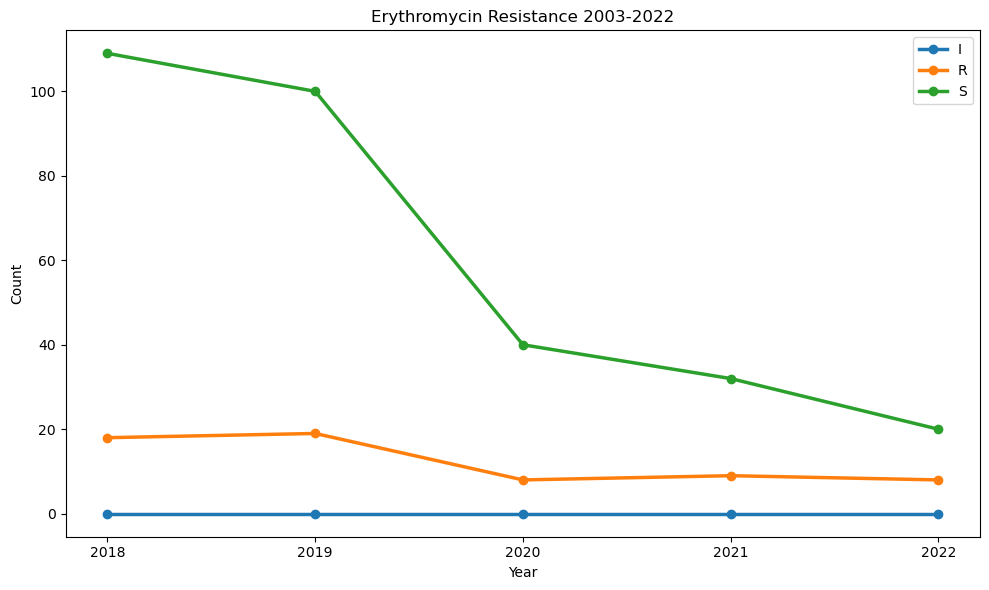

In [93]:
crosstab_ery = pd.crosstab(phenoR['Year'], phenoR['Erythromycin_Classification'])
crosstab_ery.insert(0, 'I', 0)
plt.figure(figsize=(10, 6))


for column in crosstab_ery.columns:
    plt.plot(crosstab_ery.index, crosstab_ery[column], marker='o', label=column, linewidth=2.5)  # Set a higher linewidth value

plt.title('Erythromycin Resistance 2003-2022')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(False)
plt.xticks(crosstab_ery.index)  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

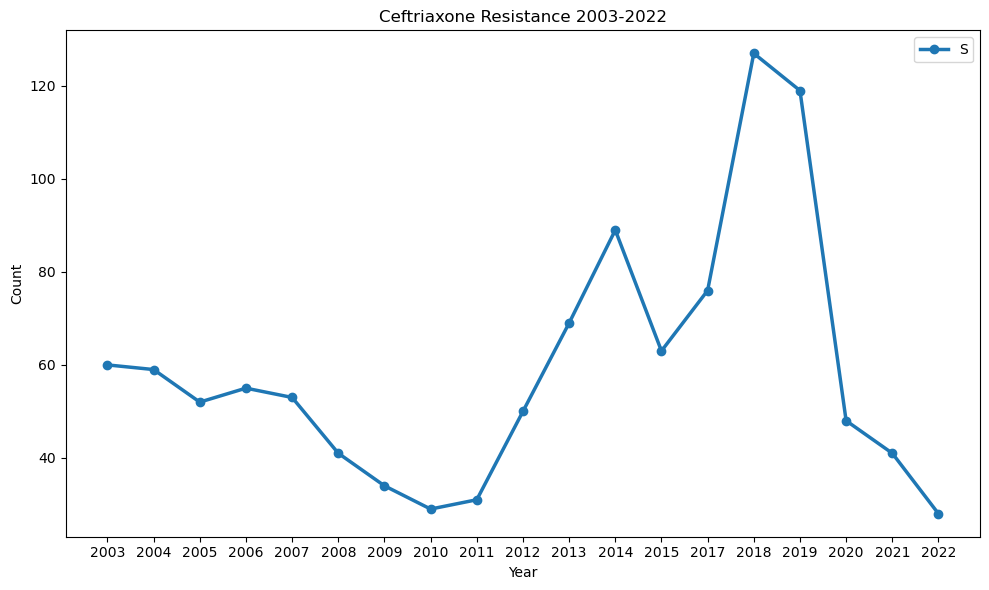

In [94]:
#crosstab_ceft = pd.crosstab(phenoR['Year'], phenoR['Ceftriaxone_Classification'])
#crosstab_ery.insert(0, 'I', 0)
#plt.figure(figsize=(10, 6))


#for column in crosstab_ceft.columns:
#    plt.plot(crosstab_ceft.index, crosstab_ceft[column], marker='o', label=column, linewidth=2.5)  # Set a higher linewidth value

#plt.title('Ceftriaxone Resistance 2003-2022')
#plt.xlabel('Year')
#plt.ylabel('Count')
#plt.legend()
#plt.grid(False)
#plt.xticks(crosstab_ceft.index)  # Ensure all years are shown on x-axis
#plt.tight_layout()
#plt.show()

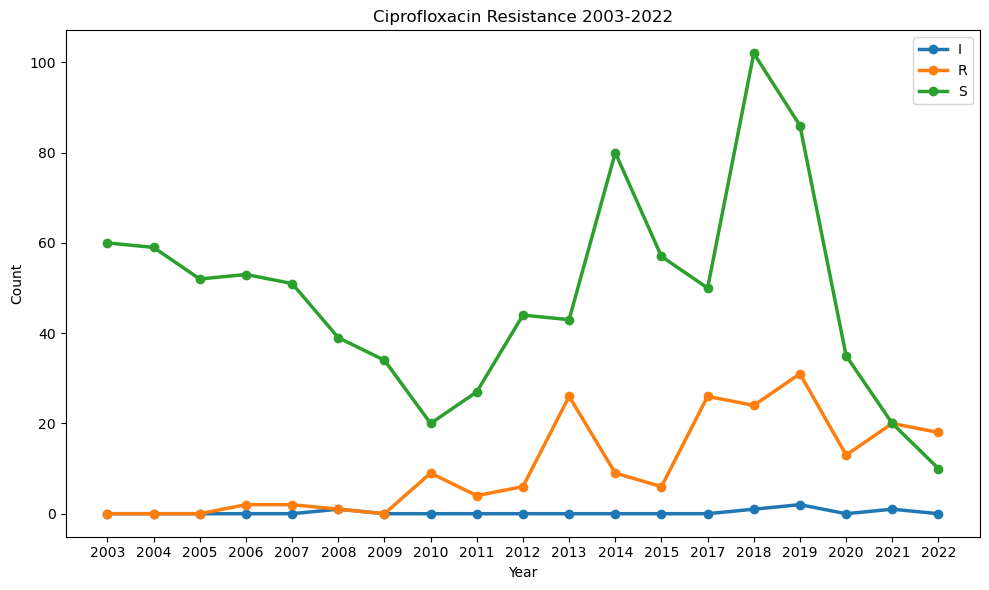

In [97]:
crosstab_cip = pd.crosstab(phenoR['Year'], phenoR['Ciprofloxacin_Classification'])

#crosstab_ery.insert(0, 'I', 0)
plt.figure(figsize=(10, 6))


for column in crosstab_cip.columns:
    plt.plot(crosstab_cip.index, crosstab_cip[column], marker='o', label=column, linewidth=2.5)  # Set a higher linewidth value

plt.title('Ciprofloxacin Resistance 2003-2022')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(False)
plt.xticks(crosstab_cip.index)  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

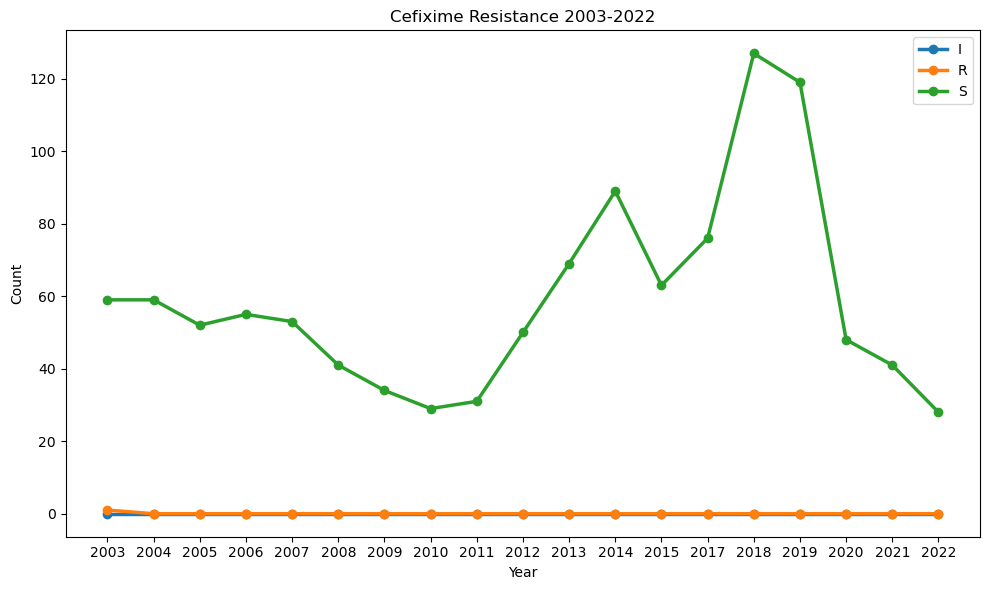

In [99]:
crosstab_cef = pd.crosstab(phenoR['Year'], phenoR['Cefixime_Classification'])

crosstab_cef.insert(0, 'I', 0)
plt.figure(figsize=(10, 6))


for column in crosstab_cef.columns:
    plt.plot(crosstab_cef.index, crosstab_cef[column], marker='o', label=column, linewidth=2.5)  # Set a higher linewidth value

plt.title('Cefixime Resistance 2003-2022')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(False)
plt.xticks(crosstab_cef.index)  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

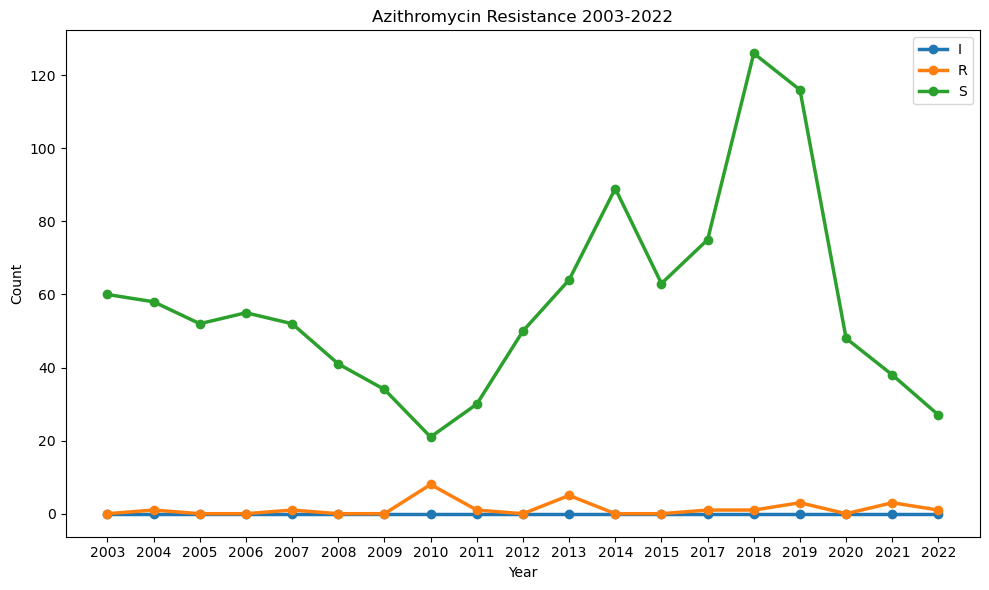

In [101]:
crosstab_az = pd.crosstab(phenoR['Year'], phenoR['Azithromycin_Classification'])

crosstab_az.insert(0, 'I', 0)
plt.figure(figsize=(10, 6))


for column in crosstab_az.columns:
    plt.plot(crosstab_az.index, crosstab_az[column], marker='o', label=column, linewidth=2.5)  # Set a higher linewidth value

plt.title('Azithromycin Resistance 2003-2022')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(False)
plt.xticks(crosstab_az.index)  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

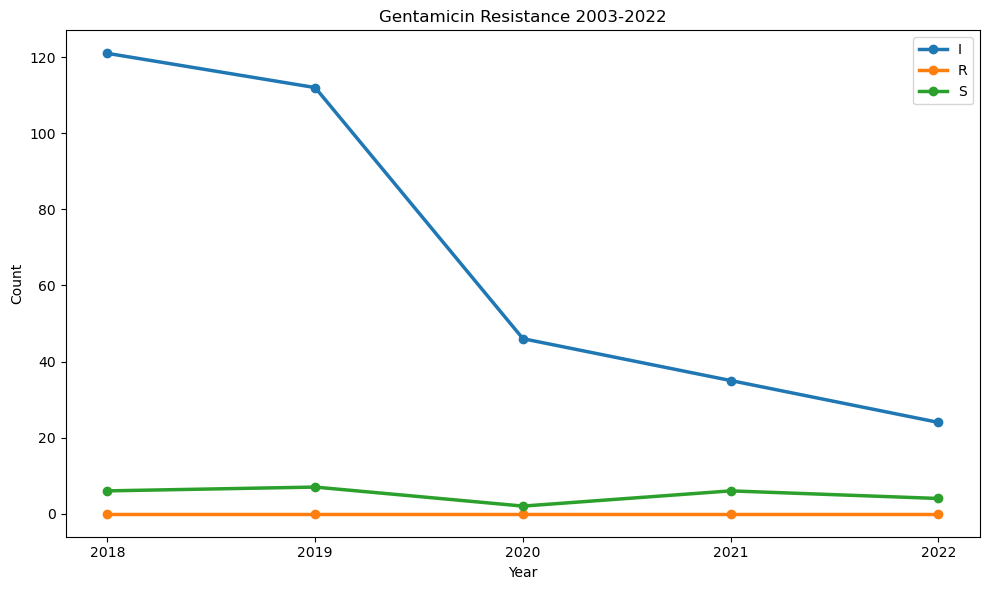

In [104]:
crosstab_gen = pd.crosstab(phenoR['Year'], phenoR['Gentamicin_Classification'])

crosstab_gen.insert(1, 'R', 0)
plt.figure(figsize=(10, 6))


for column in crosstab_gen.columns:
    plt.plot(crosstab_gen.index, crosstab_gen[column], marker='o', label=column, linewidth=2.5)  # Set a higher linewidth value

plt.title('Gentamicin Resistance 2003-2022')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(False)
plt.xticks(crosstab_gen.index)  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

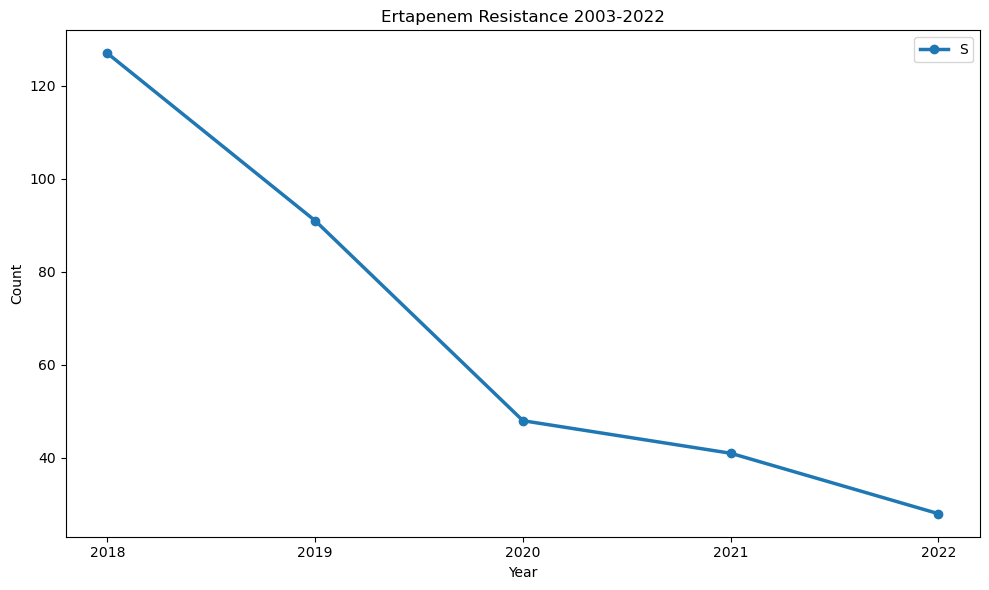

In [105]:
#crosstab_ert = pd.crosstab(phenoR['Year'], phenoR['Ertapenem_Classification'])

#crosstab_gen.insert(1, 'R', 0)

#plt.figure(figsize=(10, 6))


#for column in crosstab_ert.columns:
#    plt.plot(crosstab_ert.index, crosstab_ert[column], marker='o', label=column, linewidth=2.5)  # Set a higher linewidth value

#plt.title('Ertapenem Resistance 2003-2022')
#plt.xlabel('Year')
#plt.ylabel('Count')
#plt.legend()
#plt.grid(False)
#plt.xticks(crosstab_ert.index)  # Ensure all years are shown on x-axis
#plt.tight_layout()
#plt.show()

In [14]:
ngstar = pd.read_csv("01202014_NG_yearST.csv")

In [15]:
ngstar.head()

,Sample,NG-MAST,POR,TBPB,Genogroup Group,Genogroup,NG-STAR,penA,mtrR,porB,...,23S,ST,abcZ,adk,aroE,fumC,gdh,pdhC,pgm,Year
0,NG-1-2017,10451,6106,110,A,10451,90,34.001,1.0,11,...,100,1901,109.0,39,170.0,111.0,148.0,153.0,65.0,2017
1,NG-10-2017,11933,536,16,B,11933,1061,14.002,15.0,1,...,6,1584,59.0,39,67.0,156.0,150.0,153.0,65.0,2017
2,NG-10-2018,3671,2206,3,E,3671,1064,14.001,10.0,14,...,6,12462,59.0,39,785.0,157.0,188.0,153.0,65.0,2018
3,NG-100-2018,5985,3575,1189,C,5985,42/*2f07,14.001,10.0,3,...,?,12462,59.0,39,785.0,157.0,188.0,153.0,65.0,2018
4,NG-101-2018,5985,3575,1189,C,5985,42,14.001,10.0,3,...,100,12462,59.0,39,785.0,157.0,188.0,153.0,65.0,2018


In [127]:
ngstar_1 = ngstar[["Sample", "NG-STAR","penA", "mtrR", "porB", "ponA", "parC", "gyrA", "23S"]]

In [128]:
ngstar_1.head()

,Sample,NG-STAR,penA,mtrR,porB,ponA,parC,gyrA,23S
0,NG-1-2017,90,34.001,1.0,11,1.0,3.0,1,100
1,NG-10-2017,1061,14.002,15.0,1,100.0,7.0,100,6
2,NG-10-2018,1064,14.001,10.0,14,100.0,1.0,100,6
3,NG-100-2018,42/*2f07,14.001,10.0,3,100.0,1.0,100,?
4,NG-101-2018,42,14.001,10.0,3,100.0,1.0,100,100


In [129]:
ngstar_1['Year'] = ngstar_1['Sample'].str[-4:]

/tmp/ipykernel_2529480/4079458911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngstar_1['Year'] = ngstar_1['Sample'].str[-4:]


In [140]:
ngstar_1.head()

,Sample,NG-STAR,penA,mtrR,porB,ponA,parC,gyrA,23S,Year
0,NG-1-2017,90,34.001,1.0,11,1.0,3.0,1,100,2017
1,NG-10-2017,1061,14.002,15.0,1,100.0,7.0,100,6,2017
2,NG-10-2018,1064,14.001,10.0,14,100.0,1.0,100,6,2018
3,NG-100-2018,42/*2f07,14.001,10.0,3,100.0,1.0,100,?,2018
4,NG-101-2018,42,14.001,10.0,3,100.0,1.0,100,100,2018


In [44]:
crosstab_penA = pd.crosstab(ngstar_1['penA'], ngstar_1["Year"])


In [45]:
crosstab_penA

Year,2017,2018,2019,2020,2021,2022
penA,,,,,,
14.001,8,49,42,11,4,0
14.002,38,29,21,13,3,3
166.001,0,0,0,0,0,1
18.001,0,1,0,0,0,0
19.001,0,1,0,0,0,0
2.001,3,4,22,8,12,7
2.002,0,3,1,0,0,0
2.02,0,1,1,1,0,0
2.051,0,1,0,0,0,0


In [46]:
divisors = {'2017': 78, '2018': 114, '2019': 119, '2020': 47, '2021': 41, "2022": 28}

# Divide the counts in each column by the corresponding number, multiply by 100, and put the resulting numbers in new columns
for column, divisor in divisors.items():
    new_column_name = column + '_percentage'
    crosstab_penA[new_column_name] = ((crosstab_penA[column] / divisor) * 100).round(2)

In [47]:
crosstab_penA

Year,2017,2018,2019,2020,2021,2022,2017_percentage,2018_percentage,2019_percentage,2020_percentage,2021_percentage,2022_percentage
penA,,,,,,,,,,,,
14.001,8,49,42,11,4,0,10.26,42.98,35.29,23.40,9.76,0.00
14.002,38,29,21,13,3,3,48.72,25.44,17.65,27.66,7.32,10.71
166.001,0,0,0,0,0,1,0.00,0.00,0.00,0.00,0.00,3.57
18.001,0,1,0,0,0,0,0.00,0.88,0.00,0.00,0.00,0.00
19.001,0,1,0,0,0,0,0.00,0.88,0.00,0.00,0.00,0.00
2.001,3,4,22,8,12,7,3.85,3.51,18.49,17.02,29.27,25.00
2.002,0,3,1,0,0,0,0.00,2.63,0.84,0.00,0.00,0.00
2.02,0,1,1,1,0,0,0.00,0.88,0.84,2.13,0.00,0.00
2.051,0,1,0,0,0,0,0.00,0.88,0.00,0.00,0.00,0.00


In [48]:
columns_to_rename = ['2017', '2018', '2019', '2020', '2021', '2022']
for column in columns_to_rename:
    new_column_name = column + '_Counts'
    crosstab_penA.rename(columns={column: new_column_name}, inplace=True)


In [49]:
crosstab_penA

Year,2017_Counts,2018_Counts,2019_Counts,2020_Counts,2021_Counts,2022_Counts,2017_percentage,2018_percentage,2019_percentage,2020_percentage,2021_percentage,2022_percentage
penA,,,,,,,,,,,,
14.001,8,49,42,11,4,0,10.26,42.98,35.29,23.40,9.76,0.00
14.002,38,29,21,13,3,3,48.72,25.44,17.65,27.66,7.32,10.71
166.001,0,0,0,0,0,1,0.00,0.00,0.00,0.00,0.00,3.57
18.001,0,1,0,0,0,0,0.00,0.88,0.00,0.00,0.00,0.00
19.001,0,1,0,0,0,0,0.00,0.88,0.00,0.00,0.00,0.00
2.001,3,4,22,8,12,7,3.85,3.51,18.49,17.02,29.27,25.00
2.002,0,3,1,0,0,0,0.00,2.63,0.84,0.00,0.00,0.00
2.02,0,1,1,1,0,0,0.00,0.88,0.84,2.13,0.00,0.00
2.051,0,1,0,0,0,0,0.00,0.88,0.00,0.00,0.00,0.00


In [50]:
for col in crosstab_penA.columns:
    if col.endswith('_Counts'):
        percentage_col_name = col.replace('_Counts', '_percentage')
        new_col_name = col.replace('_Counts', '')
        crosstab_penA[new_col_name] = crosstab_penA.apply(lambda x: f"{x[percentage_col_name]}({x[col]})", axis=1)

# Drop the original "Counts" and "Percentage" columns
crosstab_penA = crosstab_penA.drop(columns=[col for col in crosstab_penA.columns if '_Counts' in col or '_percentage' in col])



In [51]:
crosstab_penA

Year,2017,2018,2019,2020,2021,2022
penA,,,,,,
14.001,10.26(8.0),42.98(49),35.29(42),23.4(11),9.76(4),0.0(0)
14.002,48.72(38.0),25.44(29),17.65(21),27.66(13),7.32(3),10.71(3)
166.001,0.0(0.0),0.0(0),0.0(0),0.0(0),0.0(0),3.57(1)
18.001,0.0(0.0),0.88(1),0.0(0),0.0(0),0.0(0),0.0(0)
19.001,0.0(0.0),0.88(1),0.0(0),0.0(0),0.0(0),0.0(0)
2.001,3.85(3.0),3.51(4),18.49(22),17.02(8),29.27(12),25.0(7)
2.002,0.0(0.0),2.63(3),0.84(1),0.0(0),0.0(0),0.0(0)
2.02,0.0(0.0),0.88(1),0.84(1),2.13(1),0.0(0),0.0(0)
2.051,0.0(0.0),0.88(1),0.0(0),0.0(0),0.0(0),0.0(0)


In [52]:
new_column_names = {
    '2017': '2017 (n = 78)',
    '2018': '2018 (n = 114)',
    '2019': '2019 (n= 119)',
    '2020': '2020 (n = 47)',
    '2021': '2021 (n = 41)',
    '2022': '2022 (n = 28)'
}

# Rename the columns
crosstab_penA.rename(columns=new_column_names, inplace=True)

In [53]:
crosstab_penA

Year,2017 (n = 78),2018 (n = 114),2019 (n= 119),2020 (n = 47),2021 (n = 41),2022 (n = 28)
penA,,,,,,
14.001,10.26(8.0),42.98(49),35.29(42),23.4(11),9.76(4),0.0(0)
14.002,48.72(38.0),25.44(29),17.65(21),27.66(13),7.32(3),10.71(3)
166.001,0.0(0.0),0.0(0),0.0(0),0.0(0),0.0(0),3.57(1)
18.001,0.0(0.0),0.88(1),0.0(0),0.0(0),0.0(0),0.0(0)
19.001,0.0(0.0),0.88(1),0.0(0),0.0(0),0.0(0),0.0(0)
2.001,3.85(3.0),3.51(4),18.49(22),17.02(8),29.27(12),25.0(7)
2.002,0.0(0.0),2.63(3),0.84(1),0.0(0),0.0(0),0.0(0)
2.02,0.0(0.0),0.88(1),0.84(1),2.13(1),0.0(0),0.0(0)
2.051,0.0(0.0),0.88(1),0.0(0),0.0(0),0.0(0),0.0(0)


In [54]:
crosstab_penA.to_csv("02172024_penA_table.csv")

In [108]:
crosstab_mtrR = pd.crosstab(ngstar_1['mtrR'], ngstar_1["Year"])
divisors = {'2017': 78, '2018': 114, '2019': 119, '2020': 47, '2021': 41, "2022": 28}

# Divide the counts in each column by the corresponding number, multiply by 100, and put the resulting numbers in new columns
for column, divisor in divisors.items():
    new_column_name = column + '_percentage'
    crosstab_mtrR[new_column_name] = ((crosstab_mtrR[column] / divisor) * 100).round(2)
    
columns_to_rename = ['2017', '2018', '2019', '2020', '2021', '2022']
for column in columns_to_rename:
    new_column_name = column + '_Counts'
    crosstab_mtrR.rename(columns={column: new_column_name}, inplace=True)
    
for col in crosstab_mtrR.columns:
    if col.endswith('_Counts'):
        percentage_col_name = col.replace('_Counts', '_percentage')
        new_col_name = col.replace('_Counts', '')
        crosstab_mtrR[new_col_name] = crosstab_mtrR.apply(lambda x: f"{x[percentage_col_name]}({x[col]})", axis=1)

# Drop the original "Counts" and "Percentage" columns
crosstab_mtrR = crosstab_mtrR.drop(columns=[col for col in crosstab_mtrR.columns if '_Counts' in col or '_percentage' in col])

new_column_names = {
    '2017': '2017 (n = 78)',
    '2018': '2018 (n = 114)',
    '2019': '2019 (n= 119)',
    '2020': '2020 (n = 47)',
    '2021': '2021 (n = 41)',
    '2022': '2022 (n = 28)'
}

# Rename the columns
crosstab_mtrR.rename(columns=new_column_names, inplace=True)

In [110]:
crosstab_mtrR.to_csv("02212024_mtrR_table.csv")

In [111]:
crosstab_porB = pd.crosstab(ngstar_1['porB'], ngstar_1["Year"])
divisors = {'2017': 78, '2018': 114, '2019': 119, '2020': 47, '2021': 41, "2022": 28}

# Divide the counts in each column by the corresponding number, multiply by 100, and put the resulting numbers in new columns
for column, divisor in divisors.items():
    new_column_name = column + '_percentage'
    crosstab_porB[new_column_name] = ((crosstab_porB[column] / divisor) * 100).round(2)
    
columns_to_rename = ['2017', '2018', '2019', '2020', '2021', '2022']
for column in columns_to_rename:
    new_column_name = column + '_Counts'
    crosstab_porB.rename(columns={column: new_column_name}, inplace=True)
    
for col in crosstab_porB.columns:
    if col.endswith('_Counts'):
        percentage_col_name = col.replace('_Counts', '_percentage')
        new_col_name = col.replace('_Counts', '')
        crosstab_porB[new_col_name] = crosstab_porB.apply(lambda x: f"{x[percentage_col_name]}({x[col]})", axis=1)

# Drop the original "Counts" and "Percentage" columns
crosstab_porB = crosstab_porB.drop(columns=[col for col in crosstab_porB.columns if '_Counts' in col or '_percentage' in col])

new_column_names = {
    '2017': '2017 (n = 78)',
    '2018': '2018 (n = 114)',
    '2019': '2019 (n= 119)',
    '2020': '2020 (n = 47)',
    '2021': '2021 (n = 41)',
    '2022': '2022 (n = 28)'
}

# Rename the columns
crosstab_porB.rename(columns=new_column_names, inplace=True)

In [113]:
crosstab_porB.to_csv("02212024_porB_table.csv")

In [114]:
crosstab_ponA = pd.crosstab(ngstar_1['ponA'], ngstar_1["Year"])
divisors = {'2017': 78, '2018': 114, '2019': 119, '2020': 47, '2021': 41, "2022": 28}

# Divide the counts in each column by the corresponding number, multiply by 100, and put the resulting numbers in new columns
for column, divisor in divisors.items():
    new_column_name = column + '_percentage'
    crosstab_ponA[new_column_name] = ((crosstab_ponA[column] / divisor) * 100).round(2)
    
columns_to_rename = ['2017', '2018', '2019', '2020', '2021', '2022']
for column in columns_to_rename:
    new_column_name = column + '_Counts'
    crosstab_ponA.rename(columns={column: new_column_name}, inplace=True)
    
for col in crosstab_ponA.columns:
    if col.endswith('_Counts'):
        percentage_col_name = col.replace('_Counts', '_percentage')
        new_col_name = col.replace('_Counts', '')
        crosstab_ponA[new_col_name] = crosstab_ponA.apply(lambda x: f"{x[percentage_col_name]}({x[col]})", axis=1)

# Drop the original "Counts" and "Percentage" columns
crosstab_ponA = crosstab_ponA.drop(columns=[col for col in crosstab_ponA.columns if '_Counts' in col or '_percentage' in col])

new_column_names = {
    '2017': '2017 (n = 78)',
    '2018': '2018 (n = 114)',
    '2019': '2019 (n= 119)',
    '2020': '2020 (n = 47)',
    '2021': '2021 (n = 41)',
    '2022': '2022 (n = 28)'
}

# Rename the columns
crosstab_ponA.rename(columns=new_column_names, inplace=True)

In [116]:
crosstab_ponA.to_csv("02212024_ponA_table.csv")

In [124]:
crosstab_parC = pd.crosstab(ngstar_1['parC'], ngstar_1["Year"])
divisors = {'2017': 78, '2018': 114, '2019': 119, '2020': 47, '2021': 41, "2022": 28}

# Divide the counts in each column by the corresponding number, multiply by 100, and put the resulting numbers in new columns
for column, divisor in divisors.items():
    new_column_name = column + '_percentage'
    crosstab_parC[new_column_name] = ((crosstab_parC[column] / divisor) * 100).round(2)
    
columns_to_rename = ['2017', '2018', '2019', '2020', '2021', '2022']
for column in columns_to_rename:
    new_column_name = column + '_Counts'
    crosstab_parC.rename(columns={column: new_column_name}, inplace=True)
    
for col in crosstab_parC.columns:
    if col.endswith('_Counts'):
        percentage_col_name = col.replace('_Counts', '_percentage')
        new_col_name = col.replace('_Counts', '')
        crosstab_parC[new_col_name] = crosstab_parC.apply(lambda x: f"{x[percentage_col_name]}({x[col]})", axis=1)

# Drop the original "Counts" and "Percentage" columns
crosstab_parC = crosstab_parC.drop(columns=[col for col in crosstab_parC.columns if '_Counts' in col or '_percentage' in col])

new_column_names = {
    '2017': '2017 (n = 78)',
    '2018': '2018 (n = 114)',
    '2019': '2019 (n= 119)',
    '2020': '2020 (n = 47)',
    '2021': '2021 (n = 41)',
    '2022': '2022 (n = 28)'
}

# Rename the columns
crosstab_parC.rename(columns=new_column_names, inplace=True)

In [126]:
crosstab_parC.to_csv("02212024_parC_table.csv")

In [145]:
crosstab_gyrA = pd.crosstab(ngstar_1['gyrA'], ngstar_1["Year"])
divisors = {'2017': 78, '2018': 114, '2019': 119, '2020': 47, '2021': 41, "2022": 28}

# Divide the counts in each column by the corresponding number, multiply by 100, and put the resulting numbers in new columns
for column, divisor in divisors.items():
    new_column_name = column + '_percentage'
    crosstab_gyrA[new_column_name] = ((crosstab_gyrA[column] / divisor) * 100).round(2)
    
columns_to_rename = ['2017', '2018', '2019', '2020', '2021', '2022']
for column in columns_to_rename:
    new_column_name = column + '_Counts'
    crosstab_gyrA.rename(columns={column: new_column_name}, inplace=True)
    
for col in crosstab_gyrA.columns:
    if col.endswith('_Counts'):
        percentage_col_name = col.replace('_Counts', '_percentage')
        new_col_name = col.replace('_Counts', '')
        crosstab_gyrA[new_col_name] = crosstab_gyrA.apply(lambda x: f"{x[percentage_col_name]}({x[col]})", axis=1)

# Drop the original "Counts" and "Percentage" columns
crosstab_gyrA = crosstab_gyrA.drop(columns=[col for col in crosstab_gyrA.columns if '_Counts' in col or '_percentage' in col])

new_column_names = {
    '2017': '2017 (n = 78)',
    '2018': '2018 (n = 114)',
    '2019': '2019 (n= 119)',
    '2020': '2020 (n = 47)',
    '2021': '2021 (n = 41)',
    '2022': '2022 (n = 28)'
}

# Rename the columns
crosstab_gyrA.rename(columns=new_column_names, inplace=True)

In [152]:
crosstab_gyrA.to_csv("02212024_gyrA_table.csv")

In [149]:
crosstab_23S = pd.crosstab(ngstar_1['23S'], ngstar_1["Year"])
divisors = {'2017': 78, '2018': 114, '2019': 119, '2020': 47, '2021': 41, "2022": 28}

# Divide the counts in each column by the corresponding number, multiply by 100, and put the resulting numbers in new columns
for column, divisor in divisors.items():
    new_column_name = column + '_percentage'
    crosstab_23S[new_column_name] = ((crosstab_23S[column] / divisor) * 100).round(2)
    
columns_to_rename = ['2017', '2018', '2019', '2020', '2021', '2022']
for column in columns_to_rename:
    new_column_name = column + '_Counts'
    crosstab_23S.rename(columns={column: new_column_name}, inplace=True)
    
for col in crosstab_23S.columns:
    if col.endswith('_Counts'):
        percentage_col_name = col.replace('_Counts', '_percentage')
        new_col_name = col.replace('_Counts', '')
        crosstab_23S[new_col_name] = crosstab_23S.apply(lambda x: f"{x[percentage_col_name]}({x[col]})", axis=1)

# Drop the original "Counts" and "Percentage" columns
crosstab_23S = crosstab_23S.drop(columns=[col for col in crosstab_23S.columns if '_Counts' in col or '_percentage' in col])

new_column_names = {
    '2017': '2017 (n = 78)',
    '2018': '2018 (n = 114)',
    '2019': '2019 (n= 119)',
    '2020': '2020 (n = 47)',
    '2021': '2021 (n = 41)',
    '2022': '2022 (n = 28)'
}

# Rename the columns
crosstab_23S.rename(columns=new_column_names, inplace=True)

In [151]:
crosstab_23S.to_csv("02212024_23S_table.csv")